## Эксперимент на man & flower

In [1]:
from src import HybridMetaheuristic


model = HybridMetaheuristic("pic/man.png", "pic/flower.png")

/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: divide by zero encountered in log
  items.append(i * np.log(i))
/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: invalid value encountered in scalar multiply
  items.append(i * np.log(i))


In [2]:
# Запускаю алгоритм гибридной метаэвристики
model.evolution()

  0%|                                                                                                                                                                                                       | 0/100 [00:00<?, ?it/s]

Best score: 2.767058766435194


 35%|████████████████████████████████████████████████████████████████▊                                                                                                                        | 35/100 [1:19:03<1:52:14, 103.61s/it]

Best score: 2.7668115558692845


 36%|██████████████████████████████████████████████████████████████████▌                                                                                                                      | 36/100 [1:20:36<1:47:19, 100.61s/it]

Best score: 2.7668046291309607


 37%|████████████████████████████████████████████████████████████████████▍                                                                                                                    | 37/100 [1:22:23<1:47:31, 102.41s/it]

Best score: 2.764908495798977


 39%|████████████████████████████████████████████████████████████████████████▏                                                                                                                | 39/100 [1:25:38<1:41:41, 100.03s/it]

Best score: 2.7643235629270757


 40%|██████████████████████████████████████████████████████████████████████████▍                                                                                                               | 40/100 [1:27:10<1:37:28, 97.47s/it]

Best score: 2.7609220246283934
Best score: 2.7593473129150663


 41%|████████████████████████████████████████████████████████████████████████████▎                                                                                                             | 41/100 [1:28:53<1:37:40, 99.34s/it]

Best score: 2.756817736494399


 43%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                         | 43/100 [1:32:21<1:37:25, 102.55s/it]

Best score: 2.7542379863193354


 45%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                                      | 45/100 [1:35:32<1:30:52, 99.13s/it]

Best score: 2.7541378730049724
Best score: 2.747219815036609


 47%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 47/100 [1:38:45<1:25:34, 96.87s/it]

Best score: 2.747068601322196


 49%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 49/100 [1:42:05<1:24:26, 99.35s/it]

Best score: 2.746916310643813


 50%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                             | 50/100 [1:43:43<1:22:35, 99.11s/it]

Best score: 2.745625531748277


 52%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 52/100 [1:46:49<1:16:49, 96.03s/it]

Best score: 2.7455239283905426


 54%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 54/100 [1:50:19<1:17:40, 101.31s/it]

Best score: 2.7432373923444127


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 55/100 [1:52:02<1:16:26, 101.93s/it]

Best score: 2.743100906574628


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 57/100 [1:55:33<1:13:59, 103.25s/it]

Best score: 2.7396507677469315


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 58/100 [1:57:07<1:10:23, 100.57s/it]

Best score: 2.737654884888855


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 59/100 [1:58:46<1:08:17, 99.94s/it]

Best score: 2.7351655318853787


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 60/100 [2:00:46<1:10:44, 106.11s/it]

Best score: 2.7341746938547544


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 61/100 [2:02:27<1:07:49, 104.36s/it]

Best score: 2.7324462746515987


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 63/100 [2:06:03<1:05:41, 106.54s/it]

Best score: 2.7320019738109442


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 79/100 [2:33:30<34:58, 99.95s/it]

Best score: 2.7314898219458343


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [3:10:13<00:00, 114.14s/it]


In [3]:
# Лучший параметр Светлячка
model.best_firefly_value

16.553269472216144

In [4]:
from src import Watermark

# Пробую погрузить ЦВЗ с полученными параметрами
watermark = Watermark(
    model.best_candidate_indexes, 
    model.embedded_image_bin, 
    model.image_matrix, 
    model.best_firefly_value
)

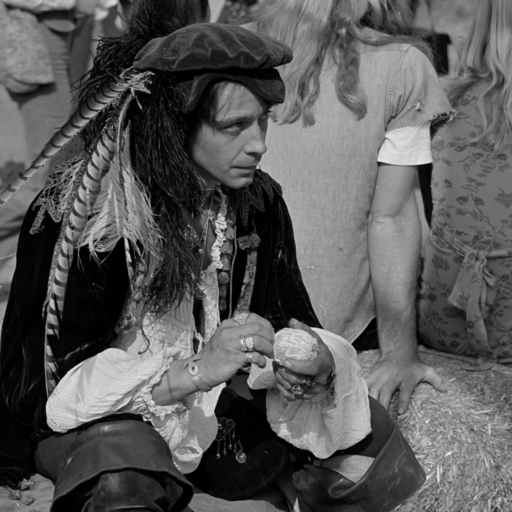

In [5]:
# Исходное изображение без ЦВЗ
model.image

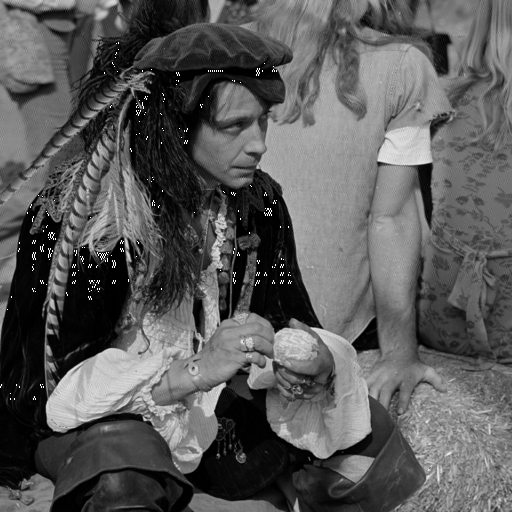

In [6]:
# Полученное изображение с ЦВЗ
watermark.watermark

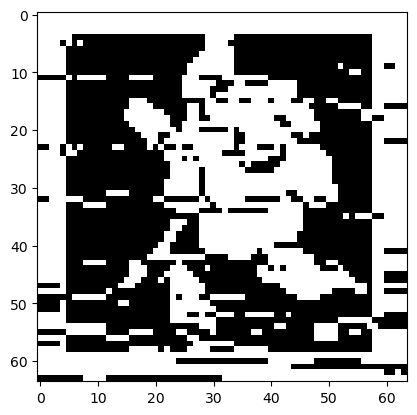

In [7]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [8]:
from src import Attack, Utilities

attacked = Attack(watermark.watermark)

In [9]:
# медианный фильтр

mf = Utilities.extracting(Utilities.matrix_to_image(attacked.mf), watermark.secret_key)
Utilities.get_normal_correlation(mf, watermark.embedded_image_bin)

0.4221780208851318

In [10]:
# фильтр Гаусса

gs3 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs3), watermark.secret_key)
Utilities.get_normal_correlation(gs3, watermark.embedded_image_bin)

0.9196298100340965

In [11]:
# фильтр Гаусса, kernel=5

gs5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs5), watermark.secret_key)
Utilities.get_normal_correlation(gs5, watermark.embedded_image_bin)

0.9196298100340965

In [12]:
# усредненная фильтрация, kernel=3

avr = Utilities.extracting(Utilities.matrix_to_image(attacked.avr), watermark.secret_key)
Utilities.get_normal_correlation(avr, watermark.embedded_image_bin)

0.3837037037037037

In [13]:
# Фильтр увеличивает контраст соседних пикселей

shr = Utilities.extracting(Utilities.matrix_to_image(attacked.shr), watermark.secret_key)
Utilities.get_normal_correlation(shr, watermark.embedded_image_bin)

0.9196298100340965

In [14]:
# Изменение контрастности изображения с использованием гистограмм

his = Utilities.extracting(Utilities.matrix_to_image(attacked.his), watermark.secret_key)
Utilities.get_normal_correlation(his, watermark.embedded_image_bin)

0.9200390053632375

In [15]:
# Искажения яркости пикселей с параметром gamma=0.2

gc2 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc2), watermark.secret_key)
Utilities.get_normal_correlation(gc2, watermark.embedded_image_bin)

0.7607859888936352

In [16]:
# Искажения яркости пикселей с параметром gamma=0.4

gc4 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc4), watermark.secret_key)
Utilities.get_normal_correlation(gc4, watermark.embedded_image_bin)

0.9008704061895552

In [17]:
# Гауссовый шум с параметром 0,001

gn1 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn1), watermark.secret_key)
Utilities.get_normal_correlation(gn1, watermark.embedded_image_bin)

0.9193942354665364

In [18]:
# Гауссовый шум с параметром 0,005

gn5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn5), watermark.secret_key)
Utilities.get_normal_correlation(gn5, watermark.embedded_image_bin)

0.9158150851581508

In [19]:
# Гауссовый шум с параметром 0,009

gn9 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn9), watermark.secret_key)
Utilities.get_normal_correlation(gn9, watermark.embedded_image_bin)

0.9142717973697029

In [20]:
# Атака соль/перец с параметром p=0.01

sp1 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp1), watermark.secret_key)
Utilities.get_normal_correlation(sp1, watermark.embedded_image_bin)

0.8188861985472154

In [21]:
# Атака соль/перец с параметром p=0.02

sp2 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp2), watermark.secret_key)
Utilities.get_normal_correlation(sp2, watermark.embedded_image_bin)

0.7583052479537795

In [22]:
# Атака соль/перец с параметром p=0.03

sp3 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp3), watermark.secret_key)
Utilities.get_normal_correlation(sp3, watermark.embedded_image_bin)

0.7127766599597586

In [23]:
# В заданной области затемняет 1/4 пикселей, с параметром center

crp_ct = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_ct), watermark.secret_key)
Utilities.get_normal_correlation(crp_ct, watermark.embedded_image_bin)

0.748040313549832

In [24]:
# В заданной области затемняет 1/4 пикселей, с параметром top-left

crp_tl = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_tl), watermark.secret_key)
Utilities.get_normal_correlation(crp_tl, watermark.embedded_image_bin)

0.6494512588766946

In [25]:
# В заданной области затемняет 1/4 пикселей, с параметром bottom-right

crp_br = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_br), watermark.secret_key)
Utilities.get_normal_correlation(crp_br, watermark.embedded_image_bin)

0.9142586451918522

In [26]:
# Растягивает изображения и возвращает к изначальным размерам 

scl_1024 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_1024), watermark.secret_key)
Utilities.get_normal_correlation(scl_1024, watermark.embedded_image_bin)

0.9044153323629306

In [27]:
# Сжимает изображения и возвращает к изначальным размерам 

scl_256 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_256), watermark.secret_key)
Utilities.get_normal_correlation(scl_256, watermark.embedded_image_bin)

0.5438081253059227

In [28]:
# Вращает изображение против часовой стрелки на заданный угол, 5 градусов

rt5 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt5), watermark.secret_key)
Utilities.get_normal_correlation(rt5, watermark.embedded_image_bin)

0.5368923611111112

In [29]:
# Вращает изображение против часовой стрелки на заданный угол, 45 градусов

rt45 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt45), watermark.secret_key)
Utilities.get_normal_correlation(rt45, watermark.embedded_image_bin)

0.5160919540229885

In [30]:
# Вращает изображение против часовой стрелки на заданный угол, 90 градусов

rt90 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt90), watermark.secret_key)
Utilities.get_normal_correlation(rt90, watermark.embedded_image_bin)

0.520039100684262

In [31]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 70

com70 = Utilities.extracting(Utilities.matrix_to_image(attacked.com70), watermark.secret_key)
Utilities.get_normal_correlation(com70, watermark.embedded_image_bin)

0.9196298100340965

In [32]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 80

com80 = Utilities.extracting(Utilities.matrix_to_image(attacked.com80), watermark.secret_key)
Utilities.get_normal_correlation(com80, watermark.embedded_image_bin)

0.9196298100340965

In [33]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 90

com90 = Utilities.extracting(Utilities.matrix_to_image(attacked.com90), watermark.secret_key)
Utilities.get_normal_correlation(com90, watermark.embedded_image_bin)

0.9196298100340965